In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib as pl
import urllib
import os

from shapely.geometry import Point
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols

from __future__ import print_function
import os
import pandas as pd
import pylab as pl
import statsmodels.api as st
import scipy as sp 
from scipy import stats
import seaborn  as sns


from sklearn.tree import DecisionTreeRegressor


%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
data = pd.read_excel('https://apps.urban.org/features/NYC-inequality/data/download/NYC-All-Data.xlsx')
data

,Sub Boro Name,Borough,FIPS,Unbanked 2011,Underbanked 2011,Unbanked 2013,Underbanked 2013,Prepaid 2011,Prepaid 2013,% Foreign born 2011,% Poor 2011,Median Income 2011,Unemployment 2011,% Poor 2013,% Foreign born 2013,Median income 2013,Unemployment 2013
0,New York City,New York City,NaN,0.143,0.224,0.117,0.251,0.105,0.121,0.372,0.180,49461.0,0.091,0.175,0.370,58012.0,0.087
1,The Bronx,The Bronx,NaN,0.285,0.268,0.218,0.305,0.120,0.139,0.338,0.281,32058.0,0.124,0.276,0.337,33009.0,0.118
2,Manhattan,Manhattan,NaN,0.108,0.174,0.088,0.211,0.102,0.125,0.288,0.149,66299.0,0.075,0.148,0.284,72190.0,0.072
3,Staten Island,Staten Island,NaN,0.070,0.174,0.072,0.188,0.096,0.113,0.209,0.087,70578.0,0.083,0.103,0.204,69633.0,0.078
4,Brooklyn,Brooklyn,NaN,0.152,0.227,0.127,0.266,0.109,0.126,0.374,0.204,42752.0,0.098,0.195,0.372,47520.0,0.094
5,Queens,Queens,NaN,0.093,0.252,0.080,0.251,0.095,0.103,0.485,0.131,53572.0,0.082,0.123,0.481,56599.0,0.078
6,Riverdale / Kingsbridge,Bronx,3701.0,0.136,0.223,0.111,0.261,0.104,0.116,0.314,0.151,55119.0,0.123,0.117,0.295,60614.0,0.119
7,Williamsbridge / Baychester,Bronx,3702.0,0.200,0.322,0.157,0.353,0.125,0.130,0.395,0.173,43236.0,0.160,0.194,0.389,45633.0,0.145
8,Throgs Neck / Co-op City,Bronx,3703.0,0.112,0.254,0.103,0.267,0.104,0.129,0.185,0.102,53436.0,0.122,0.079,0.219,56059.0,0.089
9,Pelham Parkway,Bronx,3704.0,0.207,0.242,0.153,0.281,0.113,0.125,0.339,0.189,40745.0,0.147,0.172,0.345,43075.0,0.132


In [3]:
data_ny = data[:0]
data_borough = data[1:6]
data_fips = data[6:]

In [4]:
data_borough

,Sub Boro Name,Borough,FIPS,Unbanked 2011,Underbanked 2011,Unbanked 2013,Underbanked 2013,Prepaid 2011,Prepaid 2013,% Foreign born 2011,% Poor 2011,Median Income 2011,Unemployment 2011,% Poor 2013,% Foreign born 2013,Median income 2013,Unemployment 2013
1,The Bronx,The Bronx,NaN,0.285,0.268,0.218,0.305,0.120,0.139,0.338,0.281,32058.0,0.124,0.276,0.337,33009.0,0.118
2,Manhattan,Manhattan,NaN,0.108,0.174,0.088,0.211,0.102,0.125,0.288,0.149,66299.0,0.075,0.148,0.284,72190.0,0.072
3,Staten Island,Staten Island,NaN,0.070,0.174,0.072,0.188,0.096,0.113,0.209,0.087,70578.0,0.083,0.103,0.204,69633.0,0.078
4,Brooklyn,Brooklyn,NaN,0.152,0.227,0.127,0.266,0.109,0.126,0.374,0.204,42752.0,0.098,0.195,0.372,47520.0,0.094
5,Queens,Queens,NaN,0.093,0.252,0.080,0.251,0.095,0.103,0.485,0.131,53572.0,0.082,0.123,0.481,56599.0,0.078


In [5]:
data_fips.head()

,Sub Boro Name,Borough,FIPS,Unbanked 2011,Underbanked 2011,Unbanked 2013,Underbanked 2013,Prepaid 2011,Prepaid 2013,% Foreign born 2011,% Poor 2011,Median Income 2011,Unemployment 2011,% Poor 2013,% Foreign born 2013,Median income 2013,Unemployment 2013
6,Riverdale / Kingsbridge,Bronx,3701.0,0.136,0.223,0.111,0.261,0.104,0.116,0.314,0.151,55119.0,0.123,0.117,0.295,60614.0,0.119
7,Williamsbridge / Baychester,Bronx,3702.0,0.200,0.322,0.157,0.353,0.125,0.130,0.395,0.173,43236.0,0.160,0.194,0.389,45633.0,0.145
8,Throgs Neck / Co-op City,Bronx,3703.0,0.112,0.254,0.103,0.267,0.104,0.129,0.185,0.102,53436.0,0.122,0.079,0.219,56059.0,0.089
9,Pelham Parkway,Bronx,3704.0,0.207,0.242,0.153,0.281,0.113,0.125,0.339,0.189,40745.0,0.147,0.172,0.345,43075.0,0.132
10,Morrisania / East Tremont,Bronx,3705.0,0.417,0.254,0.281,0.313,0.133,0.158,0.313,0.407,22370.0,0.210,0.386,0.323,24259.0,0.178


In [6]:
data_fips.shape

(57, 17)

In [7]:
url = "https://data.cityofnewyork.us/api/geospatial/cwiz-gcty?method=export&format=Shapefile"
urllib.request.urlretrieve(url, "file.gz")
!unzip -d $PUIDATA file.gz

In [8]:
puma = gpd.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/" + 
                                    "geo_export_05c15ed2-67b1-4879-b48f-e336ecdf6bd7.shp")

In [9]:
puma.head()

,puma,shape_area,shape_leng,geometry
0,3701,9.792852e+07,53227.144461,POLYGON ((-73.89641133483133 40.90450452082026...
1,3702,1.889860e+08,106050.002302,"POLYGON ((-73.8442314689986 40.86942035096838,..."
2,3703,2.670137e+08,304071.257466,(POLYGON ((-73.78833349834532 40.8346671297593...
3,3704,1.062129e+08,47970.901277,"POLYGON ((-73.84792614069238 40.8713422330779,..."
4,4015,8.105438e+07,50007.415493,POLYGON ((-73.95374853778468 40.63858633758547...


In [10]:
!curl https://data.cityofnewyork.us/api/views/w7w3-xahh/rows.csv?accessType=DOWNLOAD > 'businesses.csv'

In [11]:
businesses = pd.read_csv('businesses.csv')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
businesses.columns

Index(['DCA License Number', 'License Type', 'License Expiration Date',
       'License Status', 'License Creation Date', 'Industry', 'Business Name',
       'Business Name 2', 'Address Building', 'Address Street Name',
       'Secondary Address Street Name', 'Address City', 'Address State',
       'Address ZIP', 'Contact Phone Number', 'Address Borough',
       'Borough Code', 'Community Board', 'Council District', 'BIN', 'BBL',
       'NTA', 'Census Tract', 'Detail', 'Longitude', 'Latitude', 'Location'],
      dtype='object')

In [13]:
businesses_ = businesses.drop(['DCA License Number', 'License Type', 'License Expiration Date',
       'License Status', 'License Creation Date',
       'Business Name 2', 'Address Building', 'Address Street Name',
       'Secondary Address Street Name', 'Address City', 'Address State',
       'Address ZIP', 'Contact Phone Number', 'Address Borough',
       'Borough Code', 'Community Board', 'Council District', 'BIN', 'BBL',
       'NTA', 'Census Tract', 'Detail', 'Location'], axis=1)

In [14]:
banks = businesses_[businesses_['Industry'] == 'Debt Collection Agency']
banks.describe()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,Longitude,Latitude
count,931.000000,931.000000
mean,-76.375240,40.306439
std,1.661040,0.283303
min,-77.519584,40.112385
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,-73.733941,40.887354


In [15]:
banks.head()

,Industry,Business Name,Longitude,Latitude
7,Debt Collection Agency,"MRS BPO, L.L.C.",NaN,NaN
72,Debt Collection Agency,"RGS FINANCIAL, INC.",NaN,NaN
159,Debt Collection Agency,INFOSYS BPO LIMITED,NaN,NaN
251,Debt Collection Agency,"COLLECTO, INC.",NaN,NaN
259,Debt Collection Agency,"EGS FINANCIAL CARE, INC",NaN,NaN


In [16]:
banks = banks.dropna()
banks.head()

,Industry,Business Name,Longitude,Latitude
417,Debt Collection Agency,MARCAS PROPERTIES LLC,-73.875219,40.874288
3968,Debt Collection Agency,"MRS BPO, L.L.C.",-77.519584,40.112385
6844,Debt Collection Agency,"AFNI, INC",-74.012909,40.706270
7935,Debt Collection Agency,"PRESSLER & PRESSLER, LLP",-74.005360,40.715318
17353,Debt Collection Agency,"Pressler, Felt & Warshaw, LLP",-74.005360,40.715318


In [17]:
banks.shape

(931, 4)

In [18]:
banks['Coordinates'] = list(zip(banks.Longitude, banks.Latitude))

In [19]:
banks['Coordinates'] = banks['Coordinates'].apply(Point)

In [20]:
gdf_banks = gpd.GeoDataFrame(banks, geometry='Coordinates')
gdf_banks.head()

,Industry,Business Name,Longitude,Latitude,Coordinates
417,Debt Collection Agency,MARCAS PROPERTIES LLC,-73.875219,40.874288,POINT (-73.87521868823086 40.87428796557658)
3968,Debt Collection Agency,"MRS BPO, L.L.C.",-77.519584,40.112385,POINT (-77.51958437167269 40.11238533659802)
6844,Debt Collection Agency,"AFNI, INC",-74.012909,40.706270,POINT (-74.01290870587448 40.70627017391471)
7935,Debt Collection Agency,"PRESSLER & PRESSLER, LLP",-74.005360,40.715318,POINT (-74.0053604192983 40.71531751005707)
17353,Debt Collection Agency,"Pressler, Felt & Warshaw, LLP",-74.005360,40.715318,POINT (-74.0053604192983 40.71531751005707)


In [21]:
puma.crs

{'init': 'epsg:4326'}

In [22]:
gdf_banks.crs = {'init': 'epsg:4326'}
gdf_banks.crs

{'init': 'epsg:4326'}

In [23]:
bpuma = gpd.sjoin(puma, gdf_banks)
bpuma = bpuma.rename({'puma':'FIPS'})
bpuma['puma'] = bpuma['puma'].astype(int64)
bpuma.head()

,puma,shape_area,shape_leng,geometry,index_right,Industry,Business Name,Longitude,Latitude
0,3701,9.792852e+07,53227.144461,POLYGON ((-73.89641133483133 40.90450452082026...,125407,Debt Collection Agency,"BACK OFFICE SOLUTION SERVICES, LLC",-73.914212,40.883381
0,3701,9.792852e+07,53227.144461,POLYGON ((-73.89641133483133 40.90450452082026...,102900,Debt Collection Agency,"TAPPAN, DOUGLAS & TAPPAN BELKIS",-73.912142,40.887354
1,3702,1.889860e+08,106050.002302,"POLYGON ((-73.8442314689986 40.86942035096838,...",105765,Debt Collection Agency,"NELSON, VERNA AND CLARKE, MARGARETTA",-73.868988,40.876438
2,3703,2.670137e+08,304071.257466,(POLYGON ((-73.78833349834532 40.8346671297593...,123587,Debt Collection Agency,"TARGET RECOVERY ASSOCIATES, INC.",-73.831714,40.877911
3,3704,1.062129e+08,47970.901277,"POLYGON ((-73.84792614069238 40.8713422330779,...",97913,Debt Collection Agency,ROSARIO SERVICE SOLUTIONS INC,-73.848255,40.861457


In [24]:
data_fips = data_fips.rename(columns={'FIPS':'puma'}).fillna(0)
data_fips['puma'] = data_fips['puma'].astype(int64)
data_fips.shape

(57, 17)

In [25]:
df1 = pd.DataFrame(bpuma)
df2 = df1.groupby(['puma']).size().reset_index(name='banks')
df2['puma'] = df2['puma'].astype(int64)
df2['puma'].dtype
df2.head()

,puma,banks
0,3701,2
1,3702,1
2,3703,1
3,3704,1
4,3705,2


In [26]:
data_all = data_fips.merge(df2, left_on='puma', right_on='puma', how='outer')
data_all.head()
 

,Sub Boro Name,Borough,puma,Unbanked 2011,Underbanked 2011,Unbanked 2013,Underbanked 2013,Prepaid 2011,Prepaid 2013,% Foreign born 2011,% Poor 2011,Median Income 2011,Unemployment 2011,% Poor 2013,% Foreign born 2013,Median income 2013,Unemployment 2013,banks
0,Riverdale / Kingsbridge,Bronx,3701,0.136,0.223,0.111,0.261,0.104,0.116,0.314,0.151,55119.0,0.123,0.117,0.295,60614.0,0.119,2.0
1,Williamsbridge / Baychester,Bronx,3702,0.200,0.322,0.157,0.353,0.125,0.130,0.395,0.173,43236.0,0.160,0.194,0.389,45633.0,0.145,1.0
2,Throgs Neck / Co-op City,Bronx,3703,0.112,0.254,0.103,0.267,0.104,0.129,0.185,0.102,53436.0,0.122,0.079,0.219,56059.0,0.089,1.0
3,Pelham Parkway,Bronx,3704,0.207,0.242,0.153,0.281,0.113,0.125,0.339,0.189,40745.0,0.147,0.172,0.345,43075.0,0.132,1.0
4,Morrisania / East Tremont,Bronx,3705,0.417,0.254,0.281,0.313,0.133,0.158,0.313,0.407,22370.0,0.210,0.386,0.323,24259.0,0.178,2.0


In [27]:
data_all.columns

Index(['Sub Boro Name', 'Borough', 'puma', 'Unbanked 2011', 'Underbanked 2011',
       'Unbanked 2013', 'Underbanked 2013', 'Prepaid 2011', 'Prepaid 2013',
       '% Foreign born 2011', '% Poor 2011', 'Median Income 2011',
       'Unemployment 2011', '% Poor 2013', '% Foreign born 2013',
       'Median income 2013 ', 'Unemployment 2013', 'banks'],
      dtype='object')

In [28]:
data_c = data_all.drop(['Unbanked 2011', 'Underbanked 2011', 'Prepaid 2011',
               '% Foreign born 2011', '% Poor 2011', 'Median Income 2011', 'Unemployment 2011'], axis=1)

In [29]:
data_c = data_c.dropna(0)
data_c.head()

,Sub Boro Name,Borough,puma,Unbanked 2013,Underbanked 2013,Prepaid 2013,% Poor 2013,% Foreign born 2013,Median income 2013,Unemployment 2013,banks
0,Riverdale / Kingsbridge,Bronx,3701,0.111,0.261,0.116,0.117,0.295,60614.0,0.119,2.0
1,Williamsbridge / Baychester,Bronx,3702,0.157,0.353,0.130,0.194,0.389,45633.0,0.145,1.0
2,Throgs Neck / Co-op City,Bronx,3703,0.103,0.267,0.129,0.079,0.219,56059.0,0.089,1.0
3,Pelham Parkway,Bronx,3704,0.153,0.281,0.125,0.172,0.345,43075.0,0.132,1.0
4,Morrisania / East Tremont,Bronx,3705,0.281,0.313,0.158,0.386,0.323,24259.0,0.178,2.0


In [30]:
puma['puma'] = puma['puma'].astype(int64)
sdata = puma.merge(data_all, left_on='puma', right_on='puma')
sdata.describe()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,puma,shape_area,shape_leng,Unbanked 2011,Underbanked 2011,Unbanked 2013,Underbanked 2013,Prepaid 2011,Prepaid 2013,% Foreign born 2011,% Poor 2011,Median Income 2011,Unemployment 2011,% Poor 2013,% Foreign born 2013,Median income 2013,Unemployment 2013,banks
count,55.000000,5.500000e+01,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,44.000000
mean,3936.218182,1.532632e+08,91547.959548,0.153691,0.230727,0.124800,0.257527,0.105945,0.121927,0.368055,0.184164,51005.545455,0.116436,0.178655,0.365782,54586.090909,0.101473,6.818182
std,149.997616,1.361440e+08,77522.481125,0.105767,0.064842,0.076434,0.060804,0.016293,0.020768,0.125378,0.101011,21824.368021,0.041855,0.098408,0.123057,23463.048739,0.037521,16.093149
min,3701.000000,3.984279e+07,34852.437966,0.020000,0.119000,0.026000,0.160000,0.081000,0.085000,0.152000,0.033000,21146.000000,0.047000,0.033000,0.141000,23083.000000,0.031000,1.000000
25%,3804.500000,7.498814e+07,48072.809133,0.068000,0.175500,0.063500,0.206500,0.092000,0.107500,0.270000,0.113500,36639.500000,0.085000,0.103000,0.259000,39583.500000,0.071000,NaN
50%,4005.000000,1.070001e+08,70492.955589,0.128000,0.242000,0.103000,0.261000,0.104000,0.125000,0.374000,0.173000,46619.000000,0.112000,0.154000,0.375000,49181.000000,0.094000,NaN
75%,4059.500000,1.692189e+08,98789.538654,0.211500,0.272000,0.170500,0.302000,0.121000,0.133000,0.446000,0.245000,57538.500000,0.145500,0.257500,0.450500,62184.000000,0.132500,NaN
max,4114.000000,6.760200e+08,412606.741739,0.431000,0.367000,0.313000,0.414000,0.146000,0.172000,0.704000,0.407000,119866.000000,0.210000,0.395000,0.643000,125311.000000,0.178000,99.000000


# Exploration:

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


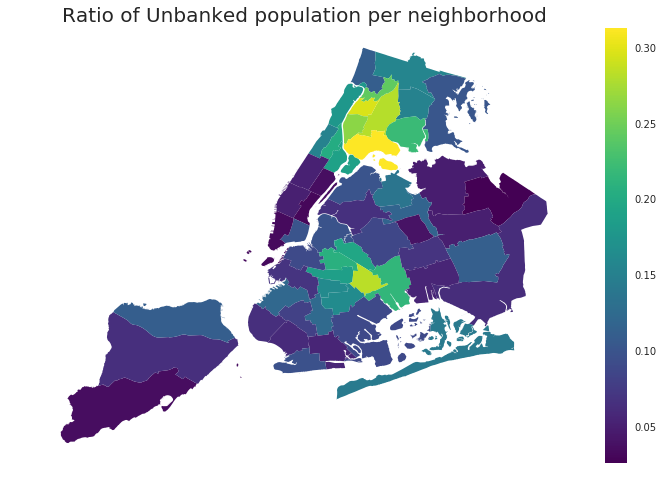

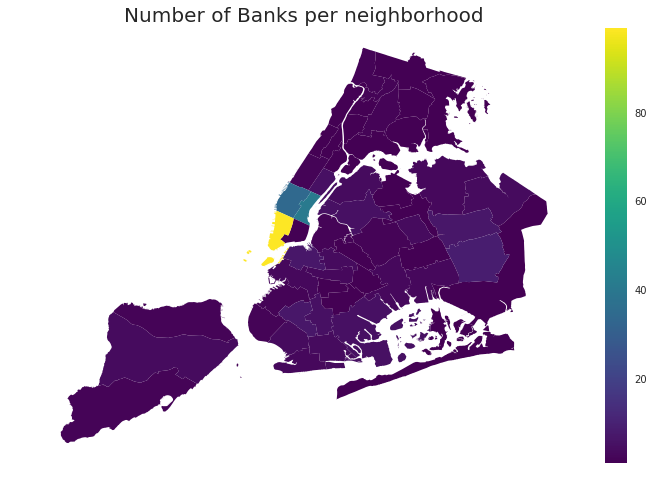

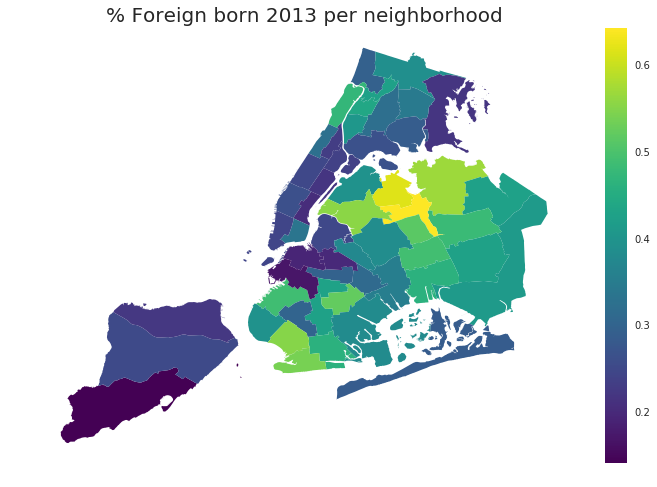

In [31]:
ax = pl.figure(figsize=(12, 8)).add_subplot(111)

sdata.plot(ax=ax, column = 'Unbanked 2013', cmap='viridis', legend=True, lw=0.4)
ax.set_title('Ratio of Unbanked population per neighborhood',size=20)
ax.axis('off')
ax.legend(loc='upper left')

ax = pl.figure(figsize=(12, 8)).add_subplot(111)
sdata.plot(ax=ax, column = 'banks', cmap='viridis', legend=True, lw=0.4)
ax.set_title('Number of Banks per neighborhood',size=20)
ax.axis('off')
ax.set_clim=(1, 20)
ax.legend(loc='upper left')

ax = pl.figure(figsize=(12, 8)).add_subplot(111)
sdata.plot(ax=ax, column = '% Foreign born 2013', cmap='viridis', legend=True, lw=0.4)
ax.set_title('% Foreign born 2013 per neighborhood',size=20)
ax.axis('off')
ax.legend(loc='upper left')

### The maps above show the spatial relationship between uncorrelated features by neighborhood.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


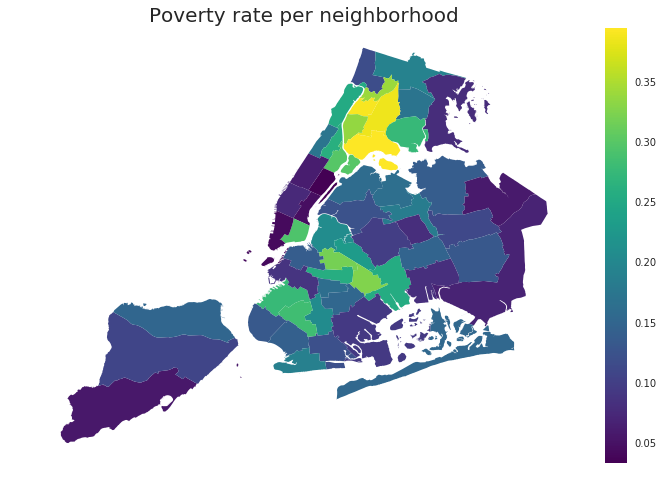

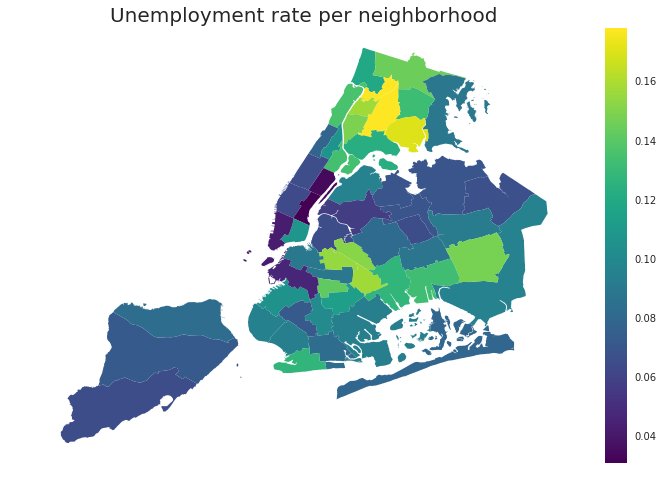

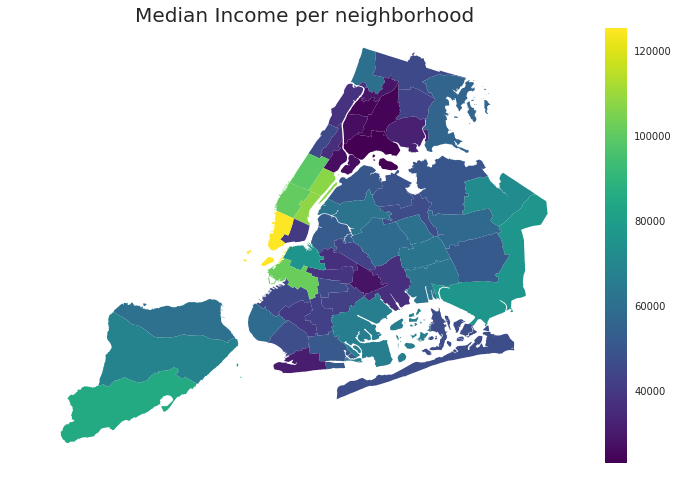

In [32]:
ax = pl.figure(figsize=(12, 8)).add_subplot(111)

sdata.plot(ax=ax, column = '% Poor 2013', cmap='viridis', legend=True, lw=0.4)
ax.set_title('Poverty rate per neighborhood',size=20)
ax.axis('off')
ax.legend(loc='upper left')

ax = pl.figure(figsize=(12, 8)).add_subplot(111)
sdata.plot(ax=ax, column = 'Unemployment 2013', cmap='viridis', legend=True, lw=0.4)
ax.set_title('Unemployment rate per neighborhood',size=20)
ax.axis('off')
ax.legend(loc='upper left')

ax = pl.figure(figsize=(12, 8)).add_subplot(111)
sdata.plot(ax=ax, column = 'Median income 2013 ', cmap='viridis', legend=True, lw=0.4)
ax.set_title('Median Income per neighborhood',size=20)
ax.axis('off')
ax.legend(loc='upper left')

### The maps above show the spatial relationship between correlated features by neighborhood.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


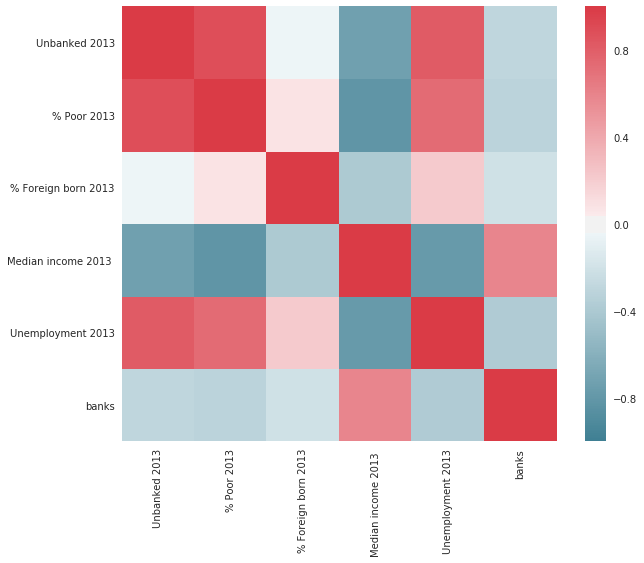

In [33]:
import seaborn as sns

x = ['Unbanked 2013','% Poor 2013', '% Foreign born 2013',
     'Median income 2013 ', 'Unemployment 2013', 'banks']

f, ax = pl.subplots(figsize=(10, 8))
corr = data_c[x].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

### The figure above shows a correlation matrix between all features. There is a weak correlation between the availability of banks in a neighborhood and the ratio of unbanked households. The increase in the ratio of unbanked households is mainly related to two socio-economic features: poverty level and unemployment.

In [34]:
modelOLS = st.OLS(exog=st.add_constant(data_c['banks']), endog=data_c['Unbanked 2013']).fit()

modelOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Unbanked 2013   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     4.009
Date:                Fri, 14 Dec 2018   Prob (F-statistic):             0.0517
Time:                        23:39:39   Log-Likelihood:                 56.676
No. Observations:                  44   AIC:                            -109.4
Df Residuals:                      42   BIC:                            -105.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.1194      0.011     10.658      0.000         0.097     0.142
banks         -0.0013      0.001     -2.002      0.052        -0.003  1.03e-05
==============================================================================
Omnibus:                        7.177   Durbin-Watson:                   0.824
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                6.783
Skew:                           0.961   Prob(JB):                       0.0337
Kurtosis:                       3.092   Cond. No.                         18.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
x1 = ['% Poor 2013', 'Median income 2013 ', 'Unemployment 2013']

modelOLS = st.OLS(exog=st.add_constant(data_c[x1]), endog=data_c['Unbanked 2013']).fit()

modelOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Unbanked 2013   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     81.11
Date:                Fri, 14 Dec 2018   Prob (F-statistic):           4.73e-17
Time:                        23:39:40   Log-Likelihood:                 97.741
No. Observations:                  44   AIC:                            -187.5
Df Residuals:                      40   BIC:                            -180.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const                  -0.1003      0.037     -2.726      0.009        -0.175    -0.026
% Poor 2013             0.5285      0.077      6.860      0.000         0.373     0.684
Median income 2013   6.572e-07   3.33e-07      1.976      0.055      -1.5e-08  1.33e-06
Unemployment 2013       0.8473      0.180      4.696      0.000         0.483     1.212
==============================================================================
Omnibus:                        1.635   Durbin-Watson:                   1.351
Prob(Omnibus):                  0.442   Jarque-Bera (JB):                0.783
Skew:                          -0.226   Prob(JB):                        0.676
Kurtosis:                       3.472   Cond. No.                     2.77e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
# For the ratio of unbanked households, Is it larger than New York City's average in 2013? >>(11.7%)
yc = np.array([1 if c > 0.117 else 0 for c in data_c['Unbanked 2013']])
yc

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [37]:
from sklearn.linear_model import Ridge

In [38]:
clf = Ridge(alpha=1.0).fit(data_c[x1], data_c['Unbanked 2013'])

In [39]:
clf

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)